In [1]:
import numpy as np
import pandas as pd

# Sklearn modules
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import joblib

In [3]:
# Load dataset
data = load_breast_cancer()

# Create DataFrame
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Shape of dataset:", X.shape)
X.head()

Shape of dataset: (569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
numerical_features = X.columns.tolist()
categorical_features = []

In [7]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ]
)

In [9]:
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['mean radius',
                                                   'mean texture',
                                                   'mean perimeter',
                                                   'mean area',
                                                   'mean smoothness',
                                                   'mean compactness',
                                                   'mean concavity',
                                                   'mean concave points',
                                                   'mean symmetry',
                                                   'mean fractal dimension',
                                                   'radius error',
                                                   'texture error',
                                                   'perimeter error',
                                                   'area error',
                                                   'smoothness error',
                                                   'compactness error',
                                                   'concavity error',
                                                   'concave points error',
                                                   'symmetry error',
                                                   'fractal dimension error',
                                                   'worst radius',
                                                   'worst texture',
                                                   'worst perimeter',
                                                   'worst area',
                                                   'worst smoothness',
                                                   'worst compactness',
                                                   'worst concavity',
                                                   'worst concave points',
                                                   'worst symmetry',
                                                   'worst fractal '
                                                   'dimension'])])),
                ('model', LogisticRegression(max_iter=1000))])

In [15]:
y_pred = pipeline.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.9790209790209791

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



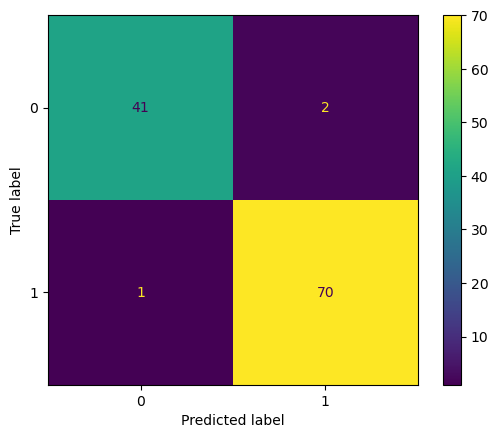

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
plt.show()

In [21]:
joblib.dump(pipeline, "breast_cancer_pipeline.pkl")

['breast_cancer_pipeline.pkl']